In [0]:
# All important library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# First we are cleaning the data
# we need to convert string values to decimal values 
# Convert male female as 1 and 0 in our data
data.loc[data['sex']=='male','sex']=1
data.loc[data['sex']=='female','sex']=0

# Convert smoker yes as 1 no as 0
data.loc[data['smoker']=='yes','smoker']=1
data.loc[data['smoker']=='no','smoker']=0

# Just see how Data Distribution 
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
# Extracting Targate for x axis and Features for y axis
targate = data['charges']
feature = data.drop(['charges','region'], axis=1)

#printing features to see how it looks
feature

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [0]:
# Here we split and sufful our data To get rid of bad prediction and for check the accuracy for our model
# Here we split our data as 70% of training data and 30% of testing data
X_train, X_test, Y_train, Y_test =train_test_split(feature,targate, test_size=0.3, random_state=20)

# print to just see how train data looks like
X_train

,age,sex,bmi,children,smoker
682,39,1,35.300,2,1
495,20,1,27.930,0,0
45,55,1,37.300,0,0
1278,39,1,29.925,1,1
354,18,0,38.280,0,0
...,...,...,...,...,...
1242,22,0,21.280,3,0
924,43,1,23.200,0,0
1247,33,1,29.400,4,0
271,50,1,34.200,2,1


In [0]:
# Here we use sklearn library the linerregression model 
lm = LinearRegression()
# Fit our training data to train our model
model = lm.fit(X_train,Y_train)

# Make a Data frame for our two prediciton
predictionOne = [{'age': 24, 'sex': 1, 'bmi':36,'children':1,'smoker':1}] 
predictionTwo = [{'age': 56, 'sex': 0, 'bmi':33,'children':0,'smoker':0}] 

# Making a DataFrame of our desire data to put that data in model and get prediction
op=pd.DataFrame(predictionOne)
tp=pd.DataFrame(predictionTwo)
onep = lm.predict(op)
twop = lm.predict(tp)

# Make a prediction for our test data 
predictionTest = lm.predict(X_test) 

# Printing the result of our two desire data
print("1st data prediction : ",onep)
print("2nd data Prediction : ",twop)


1st data prediction :  [30351.11629057]
2nd data Prediction :  [12818.49260169]


In [0]:
# print accuracy score prediction
print("Here our accuracy of our model is :: ",model.score(X_test,Y_test))

Here our accuracy of our model is ::  0.7707967879990332


Text(0, 0.5, 'Predicted Values')

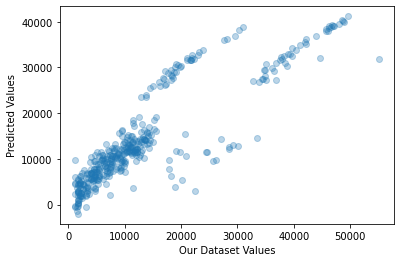

In [0]:
# Here we plot our testing plot just for curiocity 
plt.scatter(Y_test,predictionTest, alpha=0.3)
plt.xlabel("Our Dataset Values")
plt.ylabel("Predicted Values")
